# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


In [2]:
cell_img = plt.imread('data/cells.png')
cell_img.resize(256, 256)


**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [3]:
cell_ft = np.fft.fft2(cell_img)
cell_ft.dtype

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [4]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

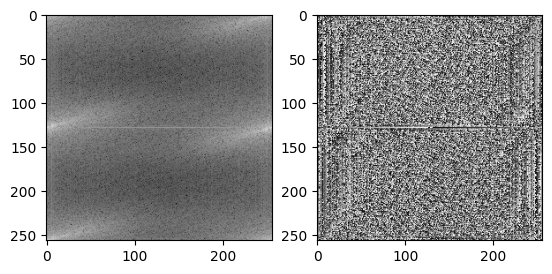

In [5]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


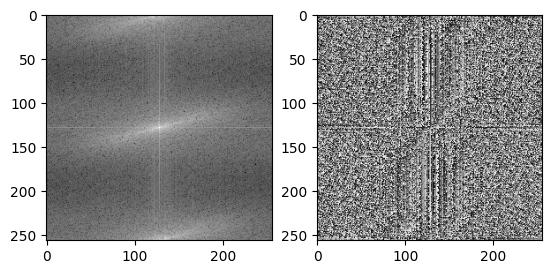

In [6]:
#shift the zero components to the center of the spectral image
shift_cell_ft = np.fft.fftshift(cell_ft)

shift_amplitude = np.abs(shift_cell_ft)
shift_phase = np.angle(shift_cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(shift_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(shift_phase, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


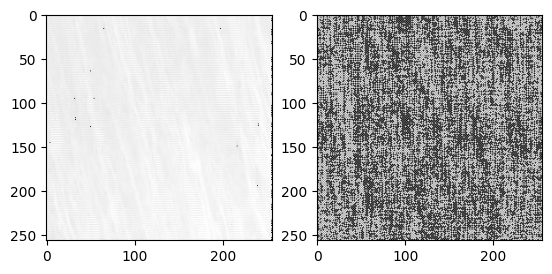

In [7]:
#inverse fast Fourier transform (IFFT) without reverse shift beforehand 
inverse_shift_cell_ft = np.fft.ifft2(shift_cell_ft)

inverse_shift_amplitude = np.abs(inverse_shift_cell_ft)
inverse_shift_phase = np.angle(inverse_shift_cell_ft)


plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(inverse_shift_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(inverse_shift_phase, 'gray')


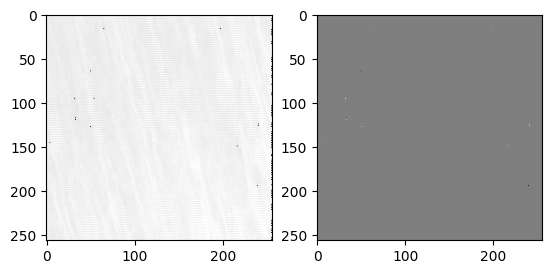

In [8]:
#correct on original img without 
#  through np.fft.ifftshift
inverse_shift_cell_ft = np.fft.ifft2(cell_ft)

inverse_shift_amplitude = np.abs(inverse_shift_cell_ft)
inverse_shift_phase = np.angle(inverse_shift_cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(inverse_shift_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(inverse_shift_phase, 'gray')

---


**[Task 2 (a).]()** Load the brain CT image.


In [9]:
brain_img = plt.imread('/workspaces/BioinfoRohr/data/brain_ct.png')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [10]:
brain_ft = np.fft.fft2(brain_img)

amplitude_brain = np.abs(brain_ft)
phase_brain = np.angle(brain_ft)

shift_brain_ft = np.fft.fftshift(brain_ft)

shift_amplitude_brain = np.abs(shift_brain_ft)
shift_phase_brain = np.angle(shift_brain_ft)

In [11]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


In [12]:
c_array_brain = to_complex_array(amplitude_brain, phase)

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


In [13]:
#amplitude 
c_array_brain = to_complex_array(amplitude, shift_phase_brain)
print(c_array_brain)

[[-11685.81206986+1.43109923e-12j   1848.88704121+5.94248453e+02j
    -826.94310522-5.66344012e+02j ...    326.58760823-6.82087004e+02j
    -826.94310522+5.66344012e+02j   1848.88704121-5.94248453e+02j]
 [ -1057.73083262+1.52664679e+03j    281.34373666-3.74583080e+02j
     -16.33956568-1.96946287e+02j ...   -399.30115195-6.90575770e+02j
     451.1958363 +1.02866909e+03j    394.11793362-8.51902150e+01j]
 [   969.24667301+1.89721419e+01j    129.58575757-2.55791659e+02j
      93.96933136+2.65932706e+02j ...    346.50193314-1.09927906e+02j
    -227.82688179+8.36398093e+01j   -175.09679751+4.03333845e+02j]
 ...
 [   388.82486287-7.59890879e+02j   -187.5911716 +5.07403131e+01j
    -220.07798646-2.75884537e+00j ...    104.43204326+1.52302619e+02j
     -18.09824442+2.47899345e+02j    275.70504286+9.10529019e+01j]
 [   969.24667301-1.89721419e+01j   -175.09679751-4.03333845e+02j
    -227.82688179-8.36398093e+01j ...   -194.54267828+1.12703337e+02j
      93.96933136-2.65932706e+02j    129.585757

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [14]:
filter_window_size = 50

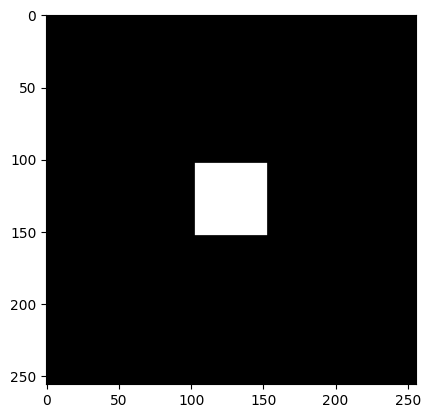

In [15]:
array_zeros = np.zeros(np.shape(brain_img))
array_zeros.shape

# Calculate the center of the image
center_y, center_x = np.shape(brain_img)[0] // 2, np.shape(brain_img)[1] // 2

# Calculate the half sizes of the filter window
half_window_y, half_window_x = filter_window_size // 2, filter_window_size // 2

# Insert a rectangle of ones at the center of the mask
array_zeros[center_y - half_window_y:center_y + half_window_y, center_x - half_window_x:center_x + half_window_x] = 1

# Display the mask to check if only the center contains ones
plt.imshow(array_zeros, "grey")
plt.show()

**[Task 3 (b).]()** Create a highpass filter maks.


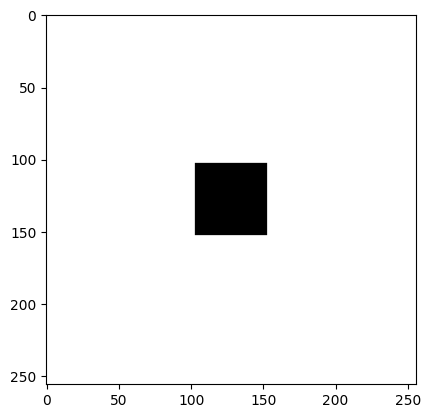

In [16]:
array_zeros = np.zeros(np.shape(brain_img))
array_zeros.shape

# Mitte des Bildes finden 
center_y, center_x = np.shape(brain_img)[0] // 2, np.shape(brain_img)[1] // 2

# Mitte des Filters finden 
half_window_y, half_window_x = filter_window_size // 2, filter_window_size // 2

# Quadrat mit 1 in der Mitte -> 50 groß 
array_zeros[center_y - half_window_y:center_y + half_window_y, center_x - half_window_x:center_x + half_window_x] = 1

# high pass filter = 1 - low pass filter 
high_pass_filter = 1- array_zeros
plt.imshow(high_pass_filter, "grey")
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_5984/3504417927.py:12: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(low_pass_brain_amp), 'gray')
/tmp/ipykernel_5984/3504417927.py:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(high_pass_brain_amp), 'gray')


Text(0.5, 1.0, 'high pass filter')

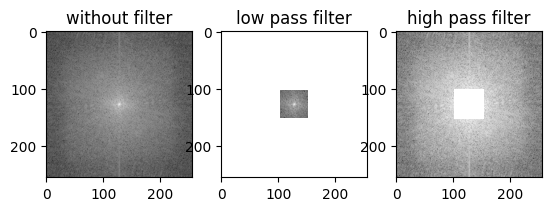

In [17]:
# array_zeros = low pass filter
low_pass_brain_amp = shift_amplitude_brain * array_zeros
high_pass_brain_amp = shift_amplitude_brain * high_pass_filter

plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(np.log(shift_amplitude_brain), 'gray')
plt.title('without filter')

plt.subplot(1, 3 , 2)
plt.imshow(np.log(low_pass_brain_amp), 'gray')
plt.title('low pass filter')

plt.subplot(1, 3 , 3)
plt.imshow(np.log(high_pass_brain_amp), 'gray')
plt.title('high pass filter')


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


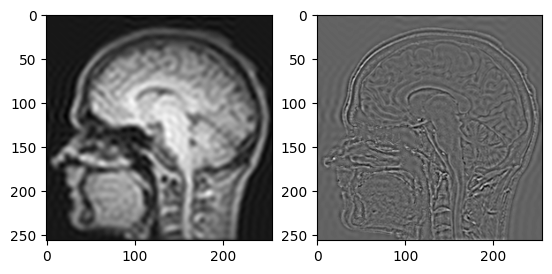

In [18]:
# low pass filter 
low_pass_rev = to_complex_array(low_pass_brain_amp, shift_phase_brain)
#reverse shift
bs_low_pass = np.fft.ifftshift(low_pass_rev)
#in Ortsraum von Frequenzraum
rev_ft_low_pass = np.fft.ifft2(bs_low_pass)
#reale Werte extrahieren, da der imaginäre Teil irrelevant ist 
rev_ft_low_pass_real = rev_ft_low_pass.real
# Bild anzeigen
plt.subplot(1,2,1)
plt.imshow(rev_ft_low_pass_real, 'gray')

# high pass filter 
high_pass_rev = to_complex_array(high_pass_brain_amp, shift_phase_brain)
bs_high_pass = np.fft.ifftshift(high_pass_rev)
rev_ft_high_pass = np.fft.ifft2(bs_high_pass)
rev_ft_high_pass_real = rev_ft_high_pass.real
plt.subplot(1,2,2)
plt.imshow(rev_ft_high_pass_real, 'gray')



---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [19]:
dft = np.zeros(np.shape(brain_img), dtype=complex)
dft

def dft(img):
    M, N = img.shape
    dft_result = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    sum_value += img[x, y] * np.exp(-2j * np.pi * ((u * x / M) + (v * y / N)))
            dft_result[u, v] = sum_value / (M * N)
    return dft_result

dft(brain_img)

KeyboardInterrupt: 

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [20]:
def idft(dft):
    M, N = dft.shape
    idft_result = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    sum_value += dft[x, y] * np.exp(2j * np.pi * ((u * x / M) + (v * y / N)))
            idft_result[u, v] = sum_value
    return idft_result

Due to high computational costs, we need to resize the image.


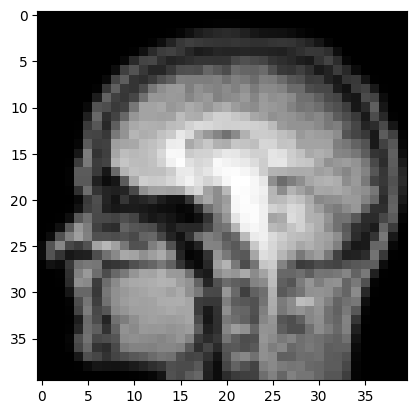

In [21]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


[[ 0.23930975+0.00000000e+00j -0.07902042+1.35039270e-02j
  -0.0293801 -8.40757442e-03j ... -0.00168727-6.82545817e-03j
  -0.0293801 +8.40757442e-03j -0.07902042-1.35039270e-02j]
 [-0.06501005+9.89234175e-04j  0.01532717+1.58226256e-03j
   0.01209535-7.33450384e-03j ...  0.005973  +5.12406457e-03j
  -0.01001424-1.52316941e-02j  0.01549852+2.38259364e-02j]
 [-0.02102203+3.41173006e-02j  0.01306517+1.31872980e-03j
   0.00038974-1.36106456e-02j ... -0.0041425 +1.79604314e-03j
   0.0201361 -4.59228613e-03j  0.0011157 -2.85754336e-02j]
 ...
 [-0.00222803-9.90004839e-04j  0.01074366-3.14743305e-03j
  -0.01147391-1.78253215e-03j ...  0.00105571-1.83702441e-03j
   0.00851254-8.62847239e-05j -0.00345942+4.93242583e-03j]
 [-0.02102203-3.41173006e-02j  0.0011157 +2.85754336e-02j
   0.0201361 +4.59228613e-03j ... -0.00159039-1.32590434e-03j
   0.00038974+1.36106456e-02j  0.01306517-1.31872980e-03j]
 [-0.06501005-9.89234175e-04j  0.01549852-2.38259364e-02j
  -0.01001424+1.52316941e-02j ...  0.00628

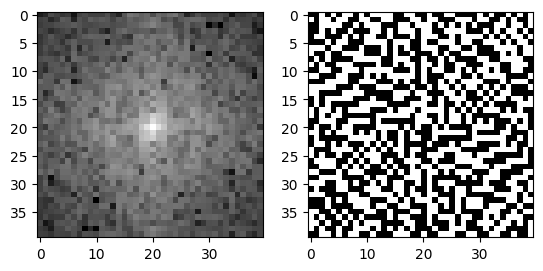

In [34]:
dft_brain = dft(test_img)
print(dft_brain)


shift_brain_ft = np.fft.fftshift(dft_brain)

shift_amplitude = np.abs(shift_brain_ft)
shift_phase = np.angle(shift_brain_ft)


amplitude_dft = np.abs(shift_amplitude)
phase_dft = np.angle(shift_phase)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_dft), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_dft, 'gray')

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


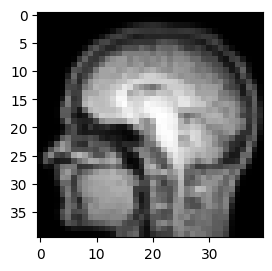

In [29]:
#reverse shift
rev_shift_dft = np.fft.ifftshift(shift_brain_ft)
#in Ortsraum von Frequenzraum
oR_trans = idft(rev_shift_dft)
#reale Werte extrahieren, da der imaginäre Teil irrelevant ist 
oR_trans_real = oR_trans.real
# Bild anzeigen
plt.subplot(1,2,1)
plt.imshow(oR_trans_real, 'gray')

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


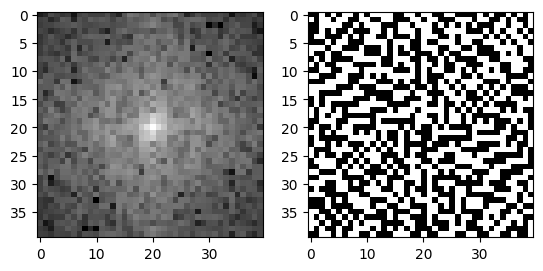

In [33]:
dft_brain_np = np.fft.fft2(test_img, norm="forward" )

shift_brain_ft_np = np.fft.fftshift(dft_brain_np)

shift_amplitude_np = np.abs(shift_brain_ft_np)
shift_phase_np = np.angle(shift_brain_ft_np)


amplitude_dft_np = np.abs(shift_amplitude_np)
phase_dft_np = np.angle(shift_phase_np)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_dft_np), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_dft_np, 'gray')

**[Task 4 (f).]()** Round the arrays and compare them again.


In [ ]:
np_mean = np.mean(np.abs(np.round(amplitude_dft, 5) - np.round(amplitude_dft_np, 5)))
print(np_mean)
# 13 Nachkommestellen höchste mit Gleichheit 
i = 13
np_same = (np.round(amplitude_dft, i) == np.round(amplitude_dft_np, i)).all()
print(np_same)

0.0
True


In [83]:
k = 0 
for i in range(1,100):
    np_same = (np.round(amplitude_dft, i) == np.round(amplitude_dft_np, i)).all()
    if np_same == True:
        k += 1
print(k)

13


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [ ]:
# 4,5 und 0,2 Sekunden